## I. Import packages

In [1]:
from __future__ import print_function
import numpy as np
from keras.datasets import mnist
from keras.utils import np_utils

from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


## II. Parameters and hyperparameters

In [2]:
nb_classes = 10
val_split = 0.1

img_rows, img_cols = 28, 28
nb_filters = 32
nb_pool = 2
kernel_size = (5, 5)

batch_size = 512
nb_epochs = 50

model_path = 'best_model.h5'

## III. Load data and split it into train and test data

In [3]:
# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

# convert class vectors to binary class matrices
y_train = np_utils.to_categorical(y_train, nb_classes)
y_test = np_utils.to_categorical(y_test, nb_classes)

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


## IV. Model

In [4]:
model = Sequential()

model.add(Convolution2D(nb_filters, (kernel_size[0], kernel_size[1]),
                        padding='valid',
                        input_shape=(img_rows, img_cols, 1)))
model.add(Activation('relu'))
model.add(Convolution2D(nb_filters, (kernel_size[0], kernel_size[1])))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
activation_1 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 32)        25632     
_________________________________________________________________
activation_2 (Activation)    (None, 20, 20, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 10, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3200)              0         
__________

## V. Train the model

In [5]:
early_stop = EarlyStopping(monitor='val_acc', patience=20, verbose=1)
check_pts = ModelCheckpoint(model_path, monitor='val_acc', save_best_only=True, verbose=1)
reduce_lr_loss = ReduceLROnPlateau(monitor='val_acc', factor=0.33, patience=5, verbose=1, epsilon=1e-3)

history = model.fit(X_train, y_train, validation_split=val_split, batch_size=batch_size, epochs=nb_epochs,
                    shuffle=True, callbacks=[early_stop, check_pts, reduce_lr_loss])

Train on 54000 samples, validate on 6000 samples
Epoch 1/50
54000/54000 [==============================] - 12s 224us/step - loss: 0.4532 - acc: 0.8591 - val_loss: 0.0774 - val_acc: 0.9797

Epoch 00001: val_acc improved from -inf to 0.97967, saving model to best_model.h5
Epoch 2/50
54000/54000 [==============================] - 9s 170us/step - loss: 0.1278 - acc: 0.9626 - val_loss: 0.0554 - val_acc: 0.9848

Epoch 00002: val_acc improved from 0.97967 to 0.98483, saving model to best_model.h5
Epoch 3/50
54000/54000 [==============================] - 9s 168us/step - loss: 0.0909 - acc: 0.9732 - val_loss: 0.0426 - val_acc: 0.9873

Epoch 00003: val_acc improved from 0.98483 to 0.98733, saving model to best_model.h5
Epoch 4/50
54000/54000 [==============================] - 9s 173us/step - loss: 0.0754 - acc: 0.9773 - val_loss: 0.0429 - val_acc: 0.9883

Epoch 00004: val_acc improved from 0.98733 to 0.98833, saving model to best_model.h5
Epoch 5/50
54000/54000 [==============================] -


Epoch 00040: val_acc did not improve
Epoch 41/50
54000/54000 [==============================] - 16s 289us/step - loss: 0.0083 - acc: 0.9972 - val_loss: 0.0293 - val_acc: 0.9942

Epoch 00041: val_acc did not improve
Epoch 42/50
54000/54000 [==============================] - 16s 289us/step - loss: 0.0084 - acc: 0.9973 - val_loss: 0.0292 - val_acc: 0.9943

Epoch 00042: val_acc did not improve

Epoch 00042: ReduceLROnPlateau reducing learning rate to 3.913539212589967e-06.
Epoch 43/50
54000/54000 [==============================] - 16s 290us/step - loss: 0.0086 - acc: 0.9972 - val_loss: 0.0293 - val_acc: 0.9942

Epoch 00043: val_acc did not improve
Epoch 44/50
54000/54000 [==============================] - 16s 289us/step - loss: 0.0095 - acc: 0.9969 - val_loss: 0.0292 - val_acc: 0.9942

Epoch 00044: val_acc did not improve
Epoch 45/50
54000/54000 [==============================] - 16s 289us/step - loss: 0.0091 - acc: 0.9970 - val_loss: 0.0292 - val_acc: 0.9942

Epoch 00045: val_acc did not

In [6]:
X_val = history.validation_data[0]
y_val = history.validation_data[1]
model.load_weights(filepath=model_path)

score = model.evaluate(X_val, y_val)
print('\nBest Val loss: ', score[0])
print('Best Val accuracy: ', score[1])

6000/6000 [==============================] - 1s 148us/step

Best Val loss:  0.0292755153496
Best Val accuracy:  0.994333333333


## VI. Evaluate the trained model on test-set

In [7]:
score = model.evaluate(X_test, y_test)
print('\nTest loss: ', score[0])
print('Test accuracy: ', score[1])

10000/10000 [==============================] - 2s 158us/step

Test loss:  0.0187461634366
Test accuracy:  0.9952


In [8]:
y_predicted = model.predict(X_test)
print("ROC-AUC score: %f" %(roc_auc_score(y_test, y_predicted)))

ROC-AUC score: 0.999978


## VII. Plot 'accuracy' and 'loss'

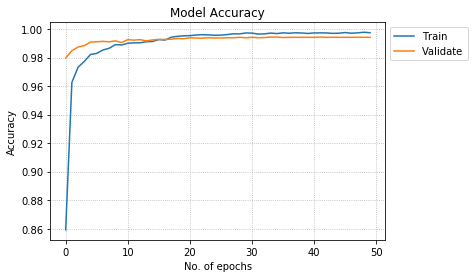

In [9]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('No. of epochs')
plt.grid(linestyle='dotted')
lgd = plt.legend(['Train', 'Validate'], bbox_to_anchor=(1, 1), loc=2)
plt.show()

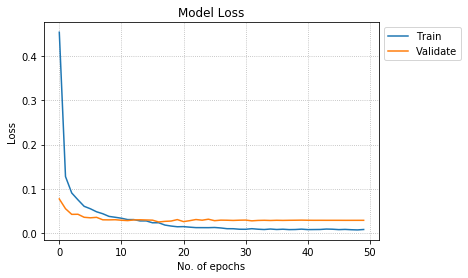

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('No. of epochs')
plt.grid(linestyle='dotted')
lgd = plt.legend(['Train', 'Validate'], bbox_to_anchor=(1, 1), loc=2)
plt.show()